# Exercise 8: Off-Lattice Monte-Carlo Simulation

### 8.1. 


### Exercise 8.2: off-lattice Monte Carlo

I implemented a simple off lattice Monte Carlo simulation of N= 100 non-interacting point particles in a box with a density of 0.2, while only considering the kinetic Energy of the particles, at a relative Temperature of $T^*=1$ with a maximal step $d_{max}= 1 \sigma$ for 200 Monte-Carlo steps.

The result of total  kinetic energy during the simulation is plotted below for three different random initialisations.The only energy a play here is the kinetic energy of the particles


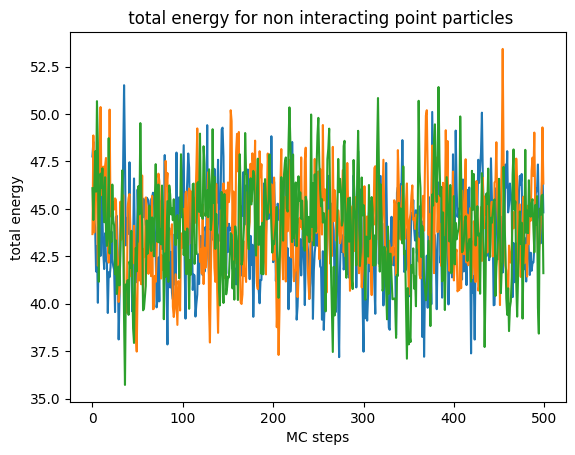

In [71]:
import numpy as np 
import matplotlib.pyplot as plt
import csv
import pandas as pd

energies = []
with open('energy_non_interacting.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents: 

        energies.append(np.asarray(row)[:-1:].astype('double'))

plt.title(" total energy for non interacting point particles")
plt.plot(np.array(energies).T)
plt.xlabel("MC steps")
plt.ylabel("total energy")
plt.show()

### Exercise 8.2 : Hard Spheres

Next for the case of non interacting hard spheres, I programmed the case of hard spheres. to make the energy plottable even when there is an overlap, I assigned each overlap an energy of $E_{overlap} = 10000$.
The effect of having different densities and different maximal steps per particle move is plotted below, for 10 different iniitalisations of the system.

In the first Figure, the particle positions were assigned completely randomly. 



In [72]:


ds=[0.01,0.3,0.5,0.7,1.]
rhos=[0.05,0.3,0.5,1]
energies = []
acceptances=[]

with open('energy_hard_spheres.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents: 

        energies.append(np.asarray(row)[:-1:].astype('double'))


with open('acceptance_hard_spheres.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents: 

        acceptances.append(np.asarray(row)[:-1:].astype('double'))




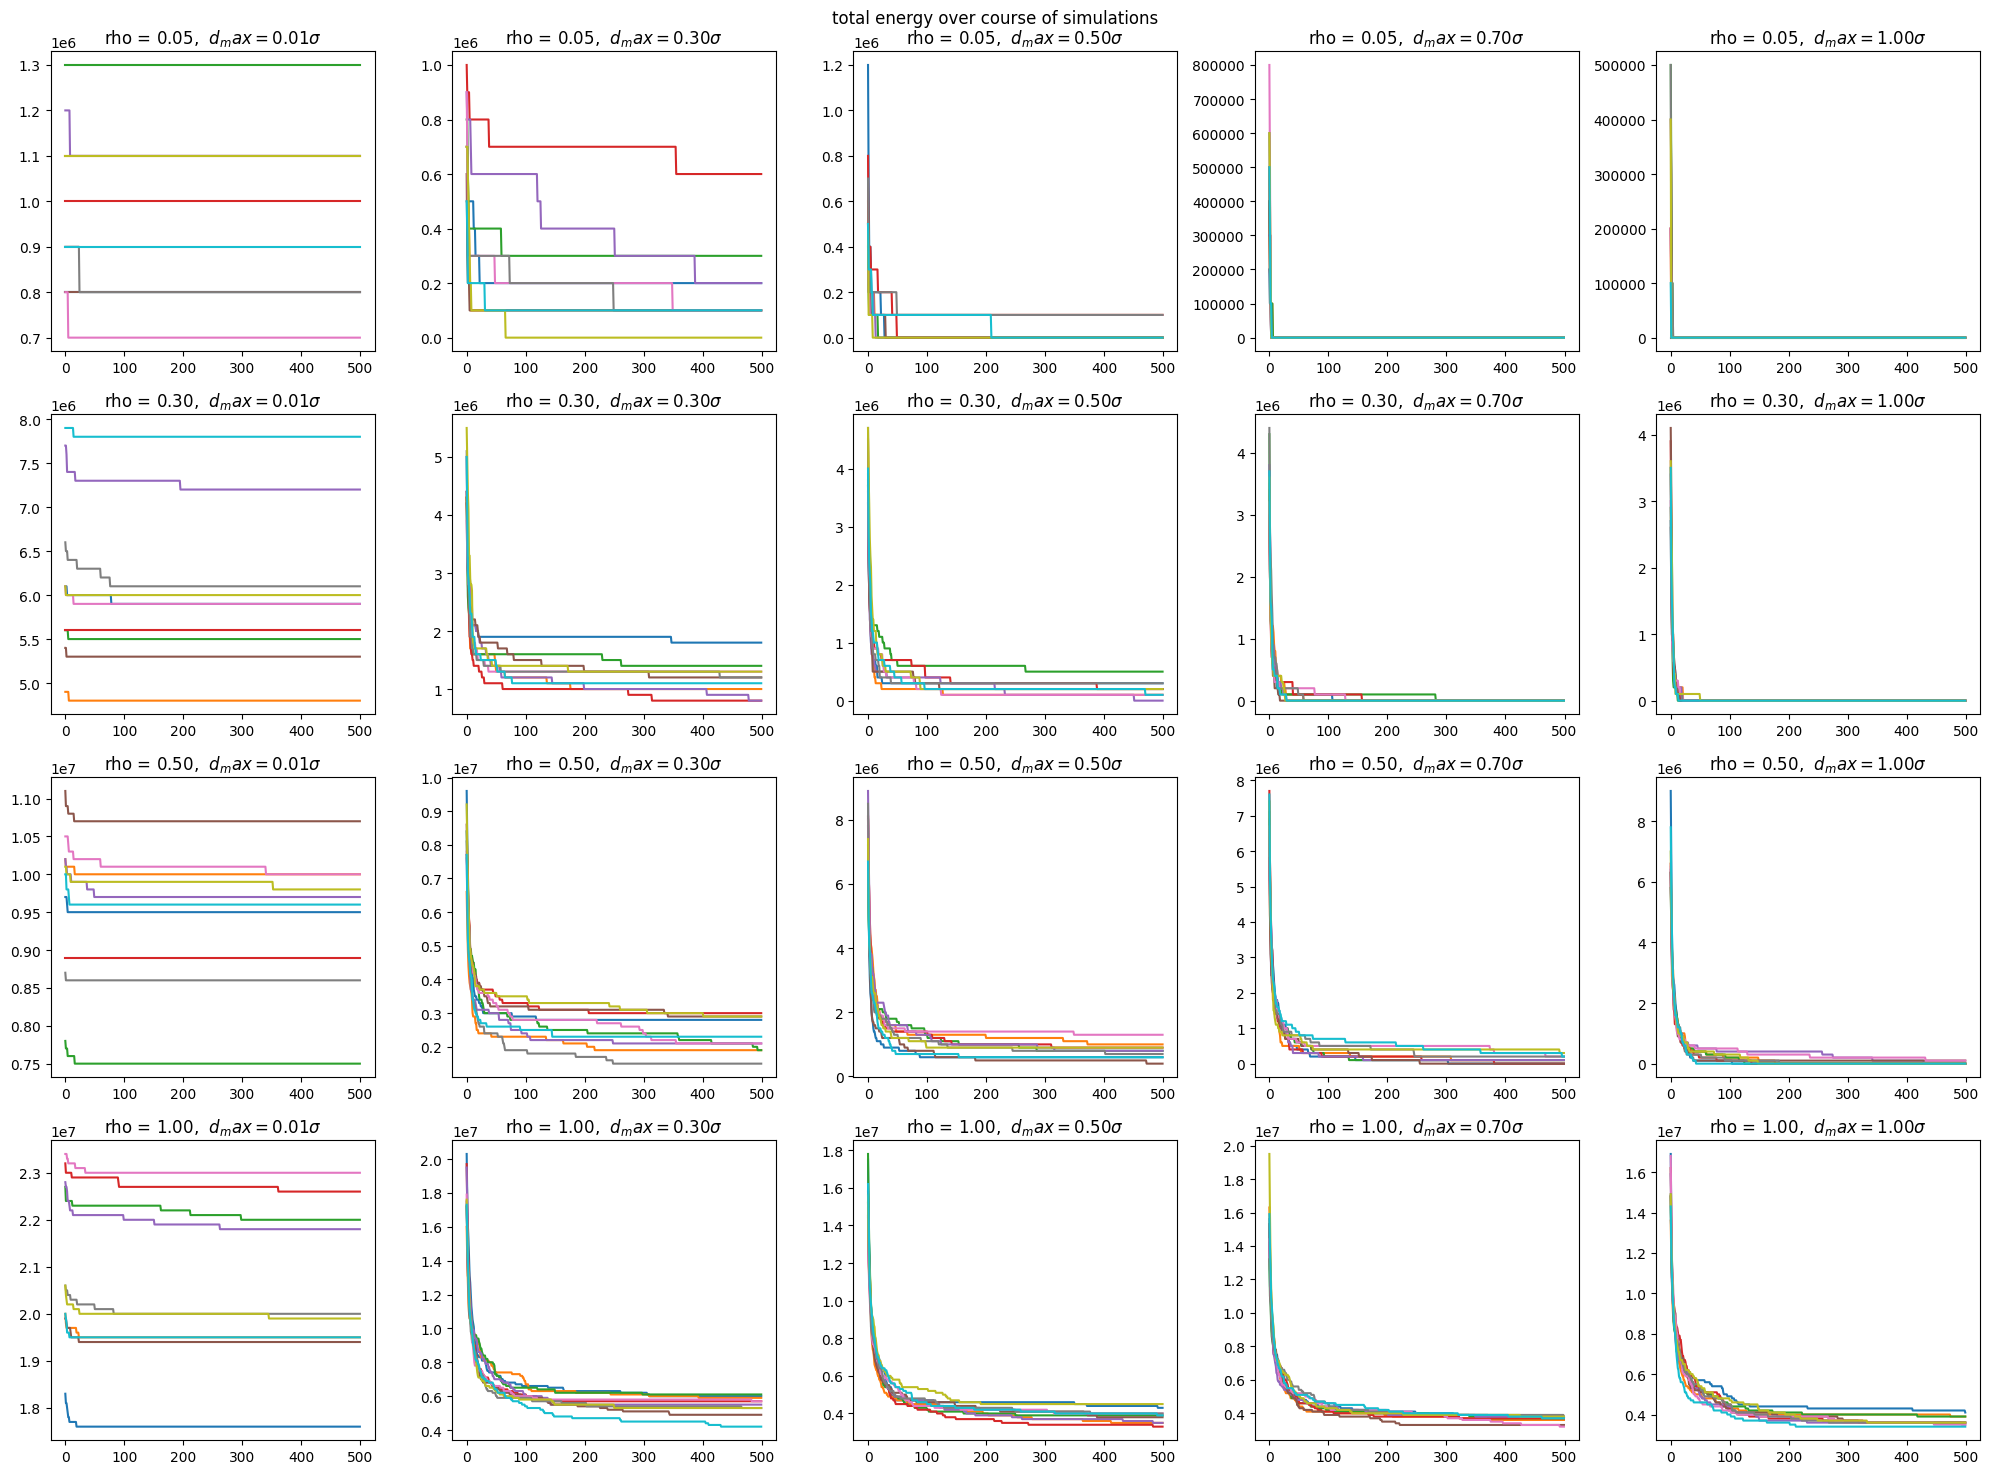

In [73]:


fig,ax=plt.subplots(4,5,figsize= (20,15), tight_layout="True")
axs=ax.flatten()
fig.suptitle("total energy over course of simulations")
for ind,j in enumerate (np.arange(0,200,10)):
    for i in range(0,10):
        #axs[ind].set_yscale("log")
        axs[ind].plot(energies[j+i])
for j, rho in enumerate(rhos):
    for i ,d in enumerate(ds):
        ax[j,i].set_title("rho = %.2f,  $d_max = %.2f \sigma$" %( rho,d))
 



the maximal step size increases from left to right, the density from top to bottom.
if the density is to high, or the maximal step size is to low, the system does not reliably reach an equalibrated, realistic state of zero energy, when starting from random inital particle positions.

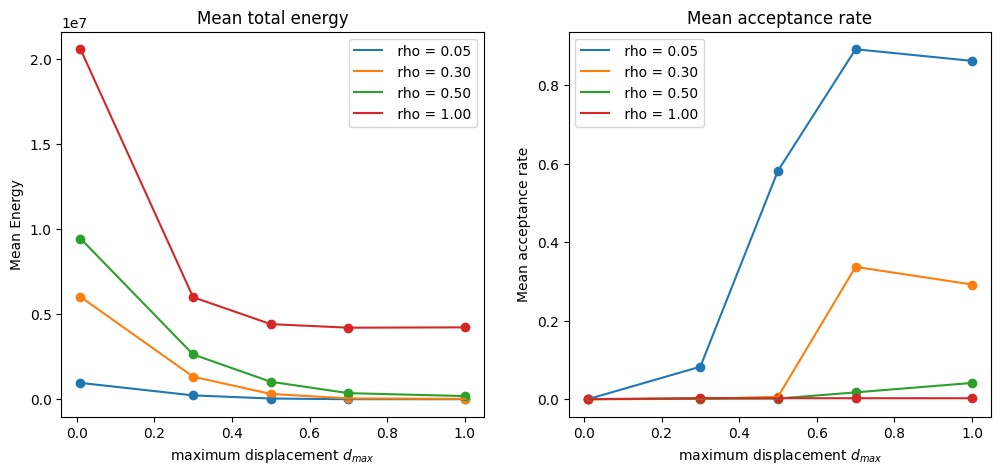

In [74]:

mean_over_each_traj=np.mean(energies,axis=1)

mean_over_10_traj=np.reshape(np.mean(np.reshape(mean_over_each_traj, (20,10)),axis=1),(4,5))

mean_over_each_traj_a=np.mean(acceptances,axis=1)

mean_over_10_traj_a=np.reshape(np.mean(np.reshape(mean_over_each_traj_a, (20,10)),axis=1),(4,5))/100

fig,axs = plt.subplots(1,2, figsize= (12,5))

for i, rho in enumerate(rhos):
    plt.axes(axs[0])
    plt.plot(ds,mean_over_10_traj[i], label=" rho = %.2f"%rho)
    plt.scatter(ds,mean_over_10_traj[i])
    plt.axes(axs[1])
    plt.plot(ds,mean_over_10_traj_a[i], label=" rho = %.2f"%rho)
    plt.scatter(ds,mean_over_10_traj_a[i])
plt.axes(axs[0])
plt.title("Mean total energy")
plt.xlabel("maximum displacement $d_{max}$")
plt.ylabel("Mean Energy")
plt.legend()
plt.axes(axs[1])
plt.title("Mean acceptance rate")
plt.xlabel("maximum displacement $d_{max}$")
plt.ylabel("Mean acceptance rate")
plt.legend()



in the left plot, the results from above are even more clear: we want the equilibrated endstate to have E=0. at a density of 1, there is not actually any way to pack the hard spheres inside the volume without overlaps, and the system accordingly never reaches a state without overlaps.
In the right plot, the average acceptance rate is plotted for the different configurations. at high densities, the acceptance rates are very low in general, but especially when the maximum displacement is set low. At maximum density. nearly every step is rejected. In general,a certain maximum dispacement is needed to enble the hard spheres to escape initital overlaps reliably. If the maximum displacement gets to high, the chances of a particle starting to overlap with another becomes bigger, and thus more steps start being rejected again.

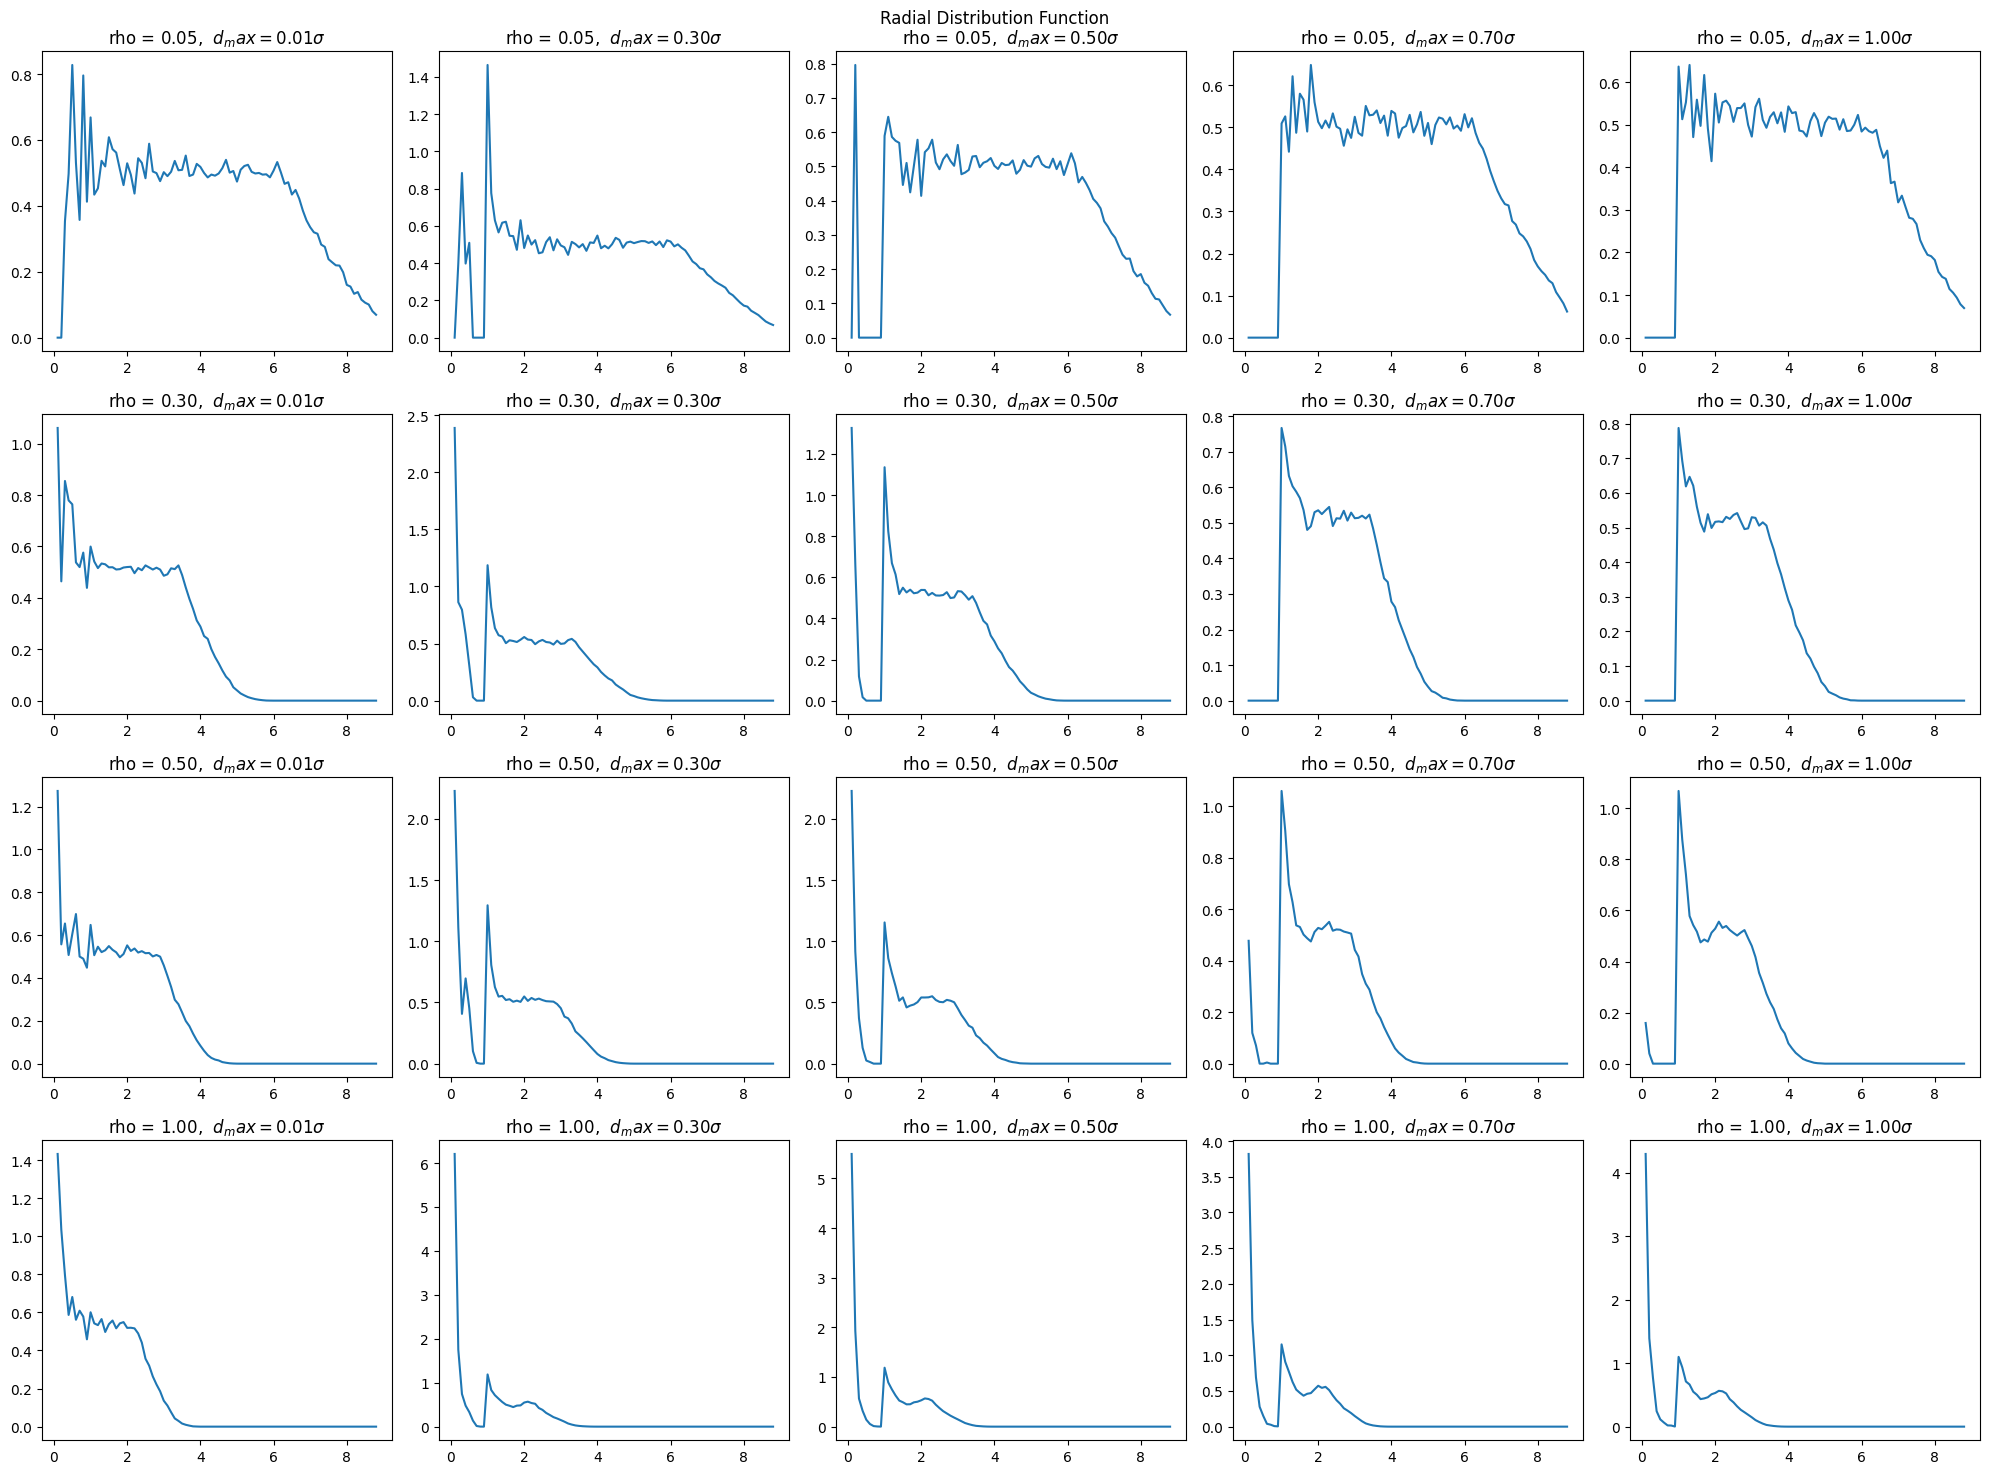

In [80]:

distances=[]
with open('distances_hard_spheres.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents:
        
        distances.append(np.asarray(row)[:-1:].astype('double'))
dr=0.1
fig, ax= plt.subplots(4,5,figsize=(20,15),tight_layout="True")
axs=ax.flatten()
bins_array= np.arange(dr,9,dr)
shell_volumes= 4/3*np.pi*(bins_array[:-1:]**3-(bins_array[:-1:]-dr)**3)

k=0
fig.suptitle("Radial Distribution Function")
for j, rho in enumerate(rhos):
    for i ,d in enumerate(ds):

        hist, edges=np.histogram(distances[k:k+10],bins_array)
        ax[j,i].plot(bins_array[:-1],hist/(1000*rho*4*np.pi*bins_array[:-1]**2*dr))
        ax[j,i].set_title("rho = %.2f,  $d_max = %.2f \sigma$" %( rho,d))
        k+=10
 

#print(hist/shell_volumes/0.2)

#hist(data_)
plt.show()


The second criterion for an allowed state of the hard spheres is that in the radial distribution function, we want no particles overlapping at a distance smaller than 1, and the rest of the particles to be uniformly distributed. Above, the radial distribution functions are plotted for all configurations.
one can clearly see the typical structure of a radial distribution functions of hard spheres, except for when the system has not successfully equilibrated to not have overlaps.( compare https://demonstrations.wolfram.com/RadialDistributionFunctionForHardSpheres/#more)

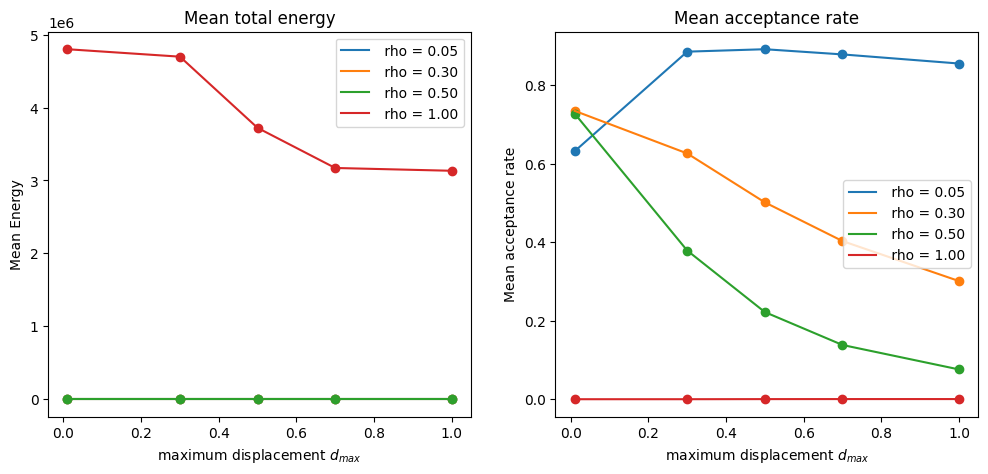

In [81]:
energies = []
acceptances=[]

with open('energy_hard_spheres_lattice.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents: 

        energies.append(np.asarray(row)[:-1:].astype('double'))


with open('acceptance_hard_spheres_lattice.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents: 

        acceptances.append(np.asarray(row)[:-1:].astype('double'))

ds=[0.01,0.3,0.5,0.7,1.]
rhos=[0.05,0.3,0.5,1]

mean_over_each_traj=np.mean(energies,axis=1)

mean_over_10_traj=np.reshape(np.mean(np.reshape(mean_over_each_traj, (20,10)),axis=1),(4,5))

mean_over_each_traj_a=np.mean(acceptances,axis=1)

mean_over_10_traj_a=np.reshape(np.mean(np.reshape(mean_over_each_traj_a, (20,10)),axis=1),(4,5))/100

fig,axs = plt.subplots(1,2, figsize= (12,5))

for i, rho in enumerate(rhos):
    plt.axes(axs[0])
    plt.plot(ds,mean_over_10_traj[i], label=" rho = %.2f"%rho)
    plt.scatter(ds,mean_over_10_traj[i])
    plt.axes(axs[1])
    plt.plot(ds,mean_over_10_traj_a[i], label=" rho = %.2f"%rho)
    plt.scatter(ds,mean_over_10_traj_a[i])
plt.axes(axs[0])
plt.title("Mean total energy")
plt.xlabel("maximum displacement $d_{max}$")
plt.ylabel("Mean Energy")
plt.legend()
plt.axes(axs[1])
plt.title("Mean acceptance rate")
plt.xlabel("maximum displacement $d_{max}$")
plt.ylabel("Mean acceptance rate")
plt.legend()



Except for the high density case where overlaps are inevitable, starting with a cubic lattice conformation enables the system to start of in a zero overlap state, and stays there. This makes the energy of the system a useless marker for equilibration, and instead it is more informative to look at the radial distribution function, as in the end there should be no remanants of the lattice structure in the final particle configuration after the MC simulation. 
The mean acceptance rate for an inital condition with particles on a lattice are in general higher, and for a variety of configurations fall into the "optimal" range between 20 and 50 percent accepted steps. 

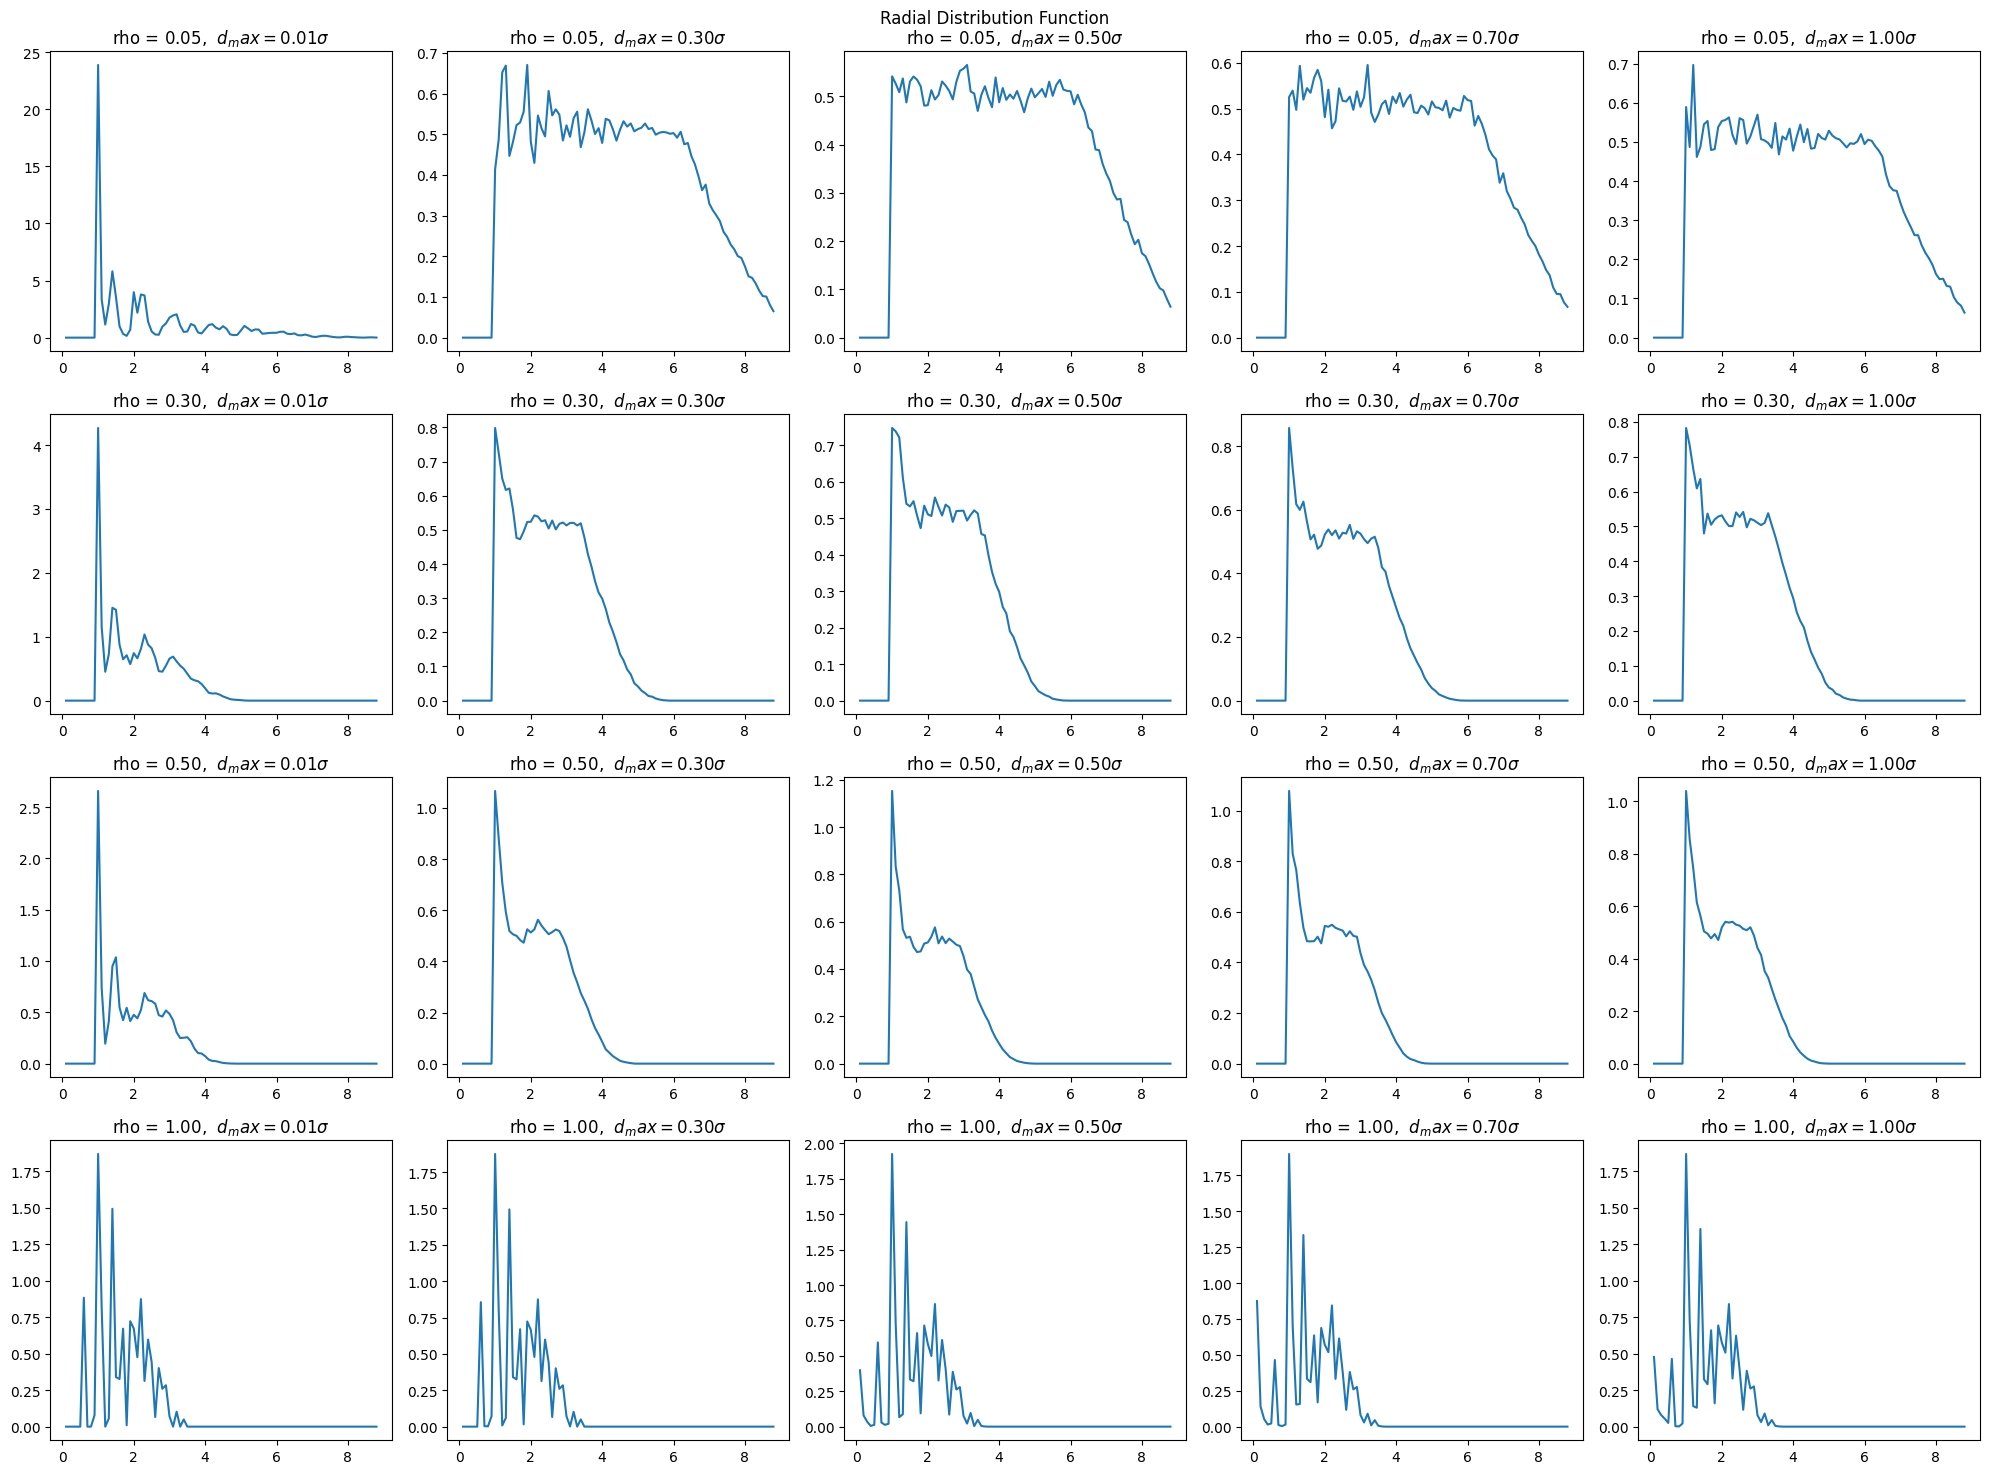

In [86]:

distances=[]
with open('distances_hard_spheres_lattice.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents:
        
        distances.append(np.asarray(row)[:-1:].astype('double'))
dr=0.1
fig, ax= plt.subplots(4,5,figsize=(20,15),tight_layout="True")
axs=ax.flatten()
bins_array= np.arange(dr,9,dr)
shell_volumes= 4/3*np.pi*(bins_array[:-1:]**3-(bins_array[:-1:]-dr)**3)


k=0
fig.suptitle("Radial Distribution Function")
for j, rho in enumerate(rhos):
    for i ,d in enumerate(ds):

        hist, edges=np.histogram(distances[k:k+10],bins_array)
        ax[j,i].plot(bins_array[:-1],hist/(1000*rho*4*np.pi*bins_array[:-1]**2*dr))
        ax[j,i].set_title("rho = %.2f,  $d_max = %.2f \sigma$" %( rho,d))
        k+=10
 


#print(hist/shell_volumes/0.2)

#hist(data_)
plt.show()

here one can clearly see that if the maximal step size is too small, the lattice configuration does not "melt" enough over the course of the simulation, there are clearly periodic structures still visible. although most likely, letting the simulation run long enough would result in those structures disapearing. Just like before,at the highest density that is too large to enable the particles to fit in the volume even for optimal close packing. Here the particles do seem to be able to leave the lattice, because changing where particles overlap does not matter as long as there is no new overlaps introduced.
In gerneral, in these cases the initialisation from a cubic lattice seems more consistent for different maximal displacements.



Text(0, 0.5, 'pressure p')

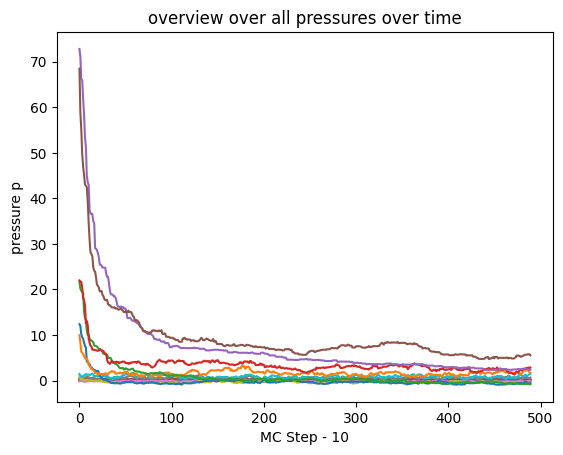

In [ ]:
data_theo_low =np.loadtxt('LJ_T09.txt')
data_theo_high = np.loadtxt('LJ_T2.dat')
densities=100/np.array([12.6, 9.6, 7.6, 6.6, 6,5.6, 5.3,5.])**3
pressure_low=[]
pressure_high=[]
with open('pressure_low.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents:
        
        pressure_low.append(np.asarray(row)[:-1:].astype('double'))
with open('pressure_high.dat') as csvfile:
    contents= csv.reader(csvfile, delimiter=",")
    #next(contents)#skip header line
    for row in contents:
        
        pressure_high.append(np.asarray(row)[:-1:].astype('double'))

plt.title("overview over all pressures over time")
for i in range(0,8):
    plt.plot(pressure_low[i][10:])
    plt.plot(pressure_high[i][10:])
plt.xlabel("MC Step - 10")
plt.ylabel("pressure p")

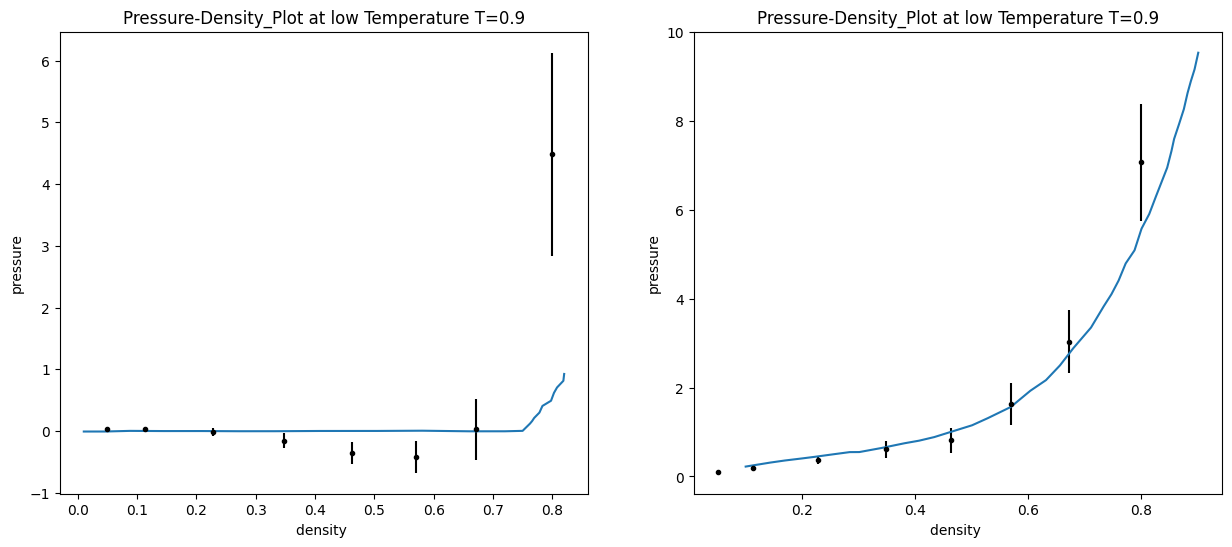

In [ ]:

fig,axs= plt.subplots(1,2,figsize=(15,6))
plt.axes(axs[0])

plt.title("Pressure-Density_Plot at low Temperature T=0.9")
for i in range(0,8):

    plt.errorbar(densities[i],np.mean(pressure_low[i][100:]),fmt=".",yerr=np.std(pressure_low[i][100:]),color="black")

plt.plot(data_theo_low.T[0], data_theo_low.T[1])
plt.xlabel("density ")
plt.ylabel("pressure")

plt.axes(axs[1])
plt.title("Pressure-Density_Plot at low Temperature T=0.9")
for i in range(0,8):
    plt.errorbar(densities[i],np.mean(pressure_high[i][100:]), fmt=".",yerr=np.std(pressure_high[i][100:]),color="black")
plt.plot(data_theo_high.T[0], data_theo_high.T[1])
plt.xlabel("density ")
plt.ylabel("pressure")
plt.show()

in this figure the mean pressure after wequilibration is plotted over the particle density.Th errorbars were estimated with the standard deviation of the pressure values.At low Temperatures for higher densities, the pressure in the simulation box looks quite different to the real world data. T This is most likely due to the fact that at low temperatures and high pressures, the acceptance rate was quite low, and the system was most likely not behaving very realistically. This is also apparent in the growing variance of the data with growing density. Maybe this result can be improved by changing the size of the maximal displacement of the particles.
Above the critical high temperatures, my simulated results match the theoretical values very well.